# **Exploratory Data Analysis using the Titanic dataset**

# Introduction

Exploratory data analysis (EDA) is a crucial step in the data analysis/science process. Improper EDA can have significant consequences on analysis if not done properly like inaccurate results, missed insights, and poor decision making. In a professional setting, this can translate to wasted resources and potentially monetary losses. EDA can be described as a process to analyze and summarize a dataset (1). The importance of EDA can be summarized by IBM (2):
>“The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.”

EDA is critical is to better understand the data and data quality. This step allows the data to communicate itself in a way that may not have been obvious. For instance, it can reveal a non-obvious relationship between two features. EDA increases the understanding of the data and the data quality which, in turn, will yield better analysis.
EDA is a big task regardless of the size of the data. There are many versions of EDA. One source described a nine step process (2), another had four steps (3),  and one had three steps (4). There is no clear process, and this can make EDA quite difficult especially for beginners, but there are goals that can guide us. It is important to note that EDA is an iterative process, not a linear one. In this blog post, I will describe the general goals of EDA: Understanding the data, data cleaning, and feature analysis using samples from Titanic dataset from Kaggle.

Why Titanic dataset?
- The dataset is readily available and is a good starter dataset to learn fundamentals without getting too bogged down in the actual dataset. In other words, it is an easy dataset. It is also messy and allows us to practice data cleaning.


*Note: The goals decribed are not accomplished in isolation. They should work in tandem. For example, you are performing Feature Analysis in Data Understanding when detecting outliers with histograms and outliers. The goal is to illustrate how one might go about performing EDA on a dataset*

*Rule of Thumb: Check your work as you make changes to your dataset. If you change a data type, drop a column, or feature engineer, make sure you make sure the changes are actually being made. Remove outliers? Check the histograms and boxplots again*

## Data Understanding/Overview

I always like to keep my raw data separate, thus the first step to understanding the data is to make a copy of the data. This copy will be used for all analysis. The goal in this step is to obtain a birds-eye view of the data - shape, datatypes, feature names, presence of duplicates, null values, and outliers. A better understanding of the data will lead to better questions and research. Below are some code snippets I like to use to better understand my data at hand.

### Load the data

In [2]:
#import libraries
import pandas as pd #data analysis and manipulation
import numpy as np #math manipulation if required
from scipy import stats #stat tests
from statsmodels.graphics.gofplots import qqplot # for qq plots

#for visuals
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#load data and make copy for all analysis
data = pd.read_csv('train.csv')
copy = data.copy()


### Data Overview

In [6]:
#get the size of the dataframe (rows, columns)
copy.shape

(891, 12)

In [7]:
#get feature names and data types, has other information as well like number of non-nulls and size of dataframe
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#get summary statistics for numerical columns
copy.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
#summary for numeric features
copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#get a sample of the data to visualize what contents may look like
#can do copy.tail() too #bottom 5
copy.head() #top 5

#you can also perform copy.sample(n) where n is the number of samples you want back. This is random


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The following code blocks indicate the number of nulls per column, the percent of nulls per column, and the total number of duplicates in our data.
We can see there are nulls in Age (20.5%), Cabin (78%), and less than one percent for Fare. 

In [30]:
#number of nulls per feature
copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# % of nulls per column

copy.isnull().sum() * 100 / len(copy)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
#number of duplicates in the df
copy.duplicated().sum()

0

I don't know what some of these features mean (e.g., SibSp), but luckily we have some documentation available [here](https://www.kaggle.com/competitions/titanic/data?select=train.csv). Look at the data card.

Always use documentation if you have access to it. Otherwise, put in an appropriate effort to research a bit. 

In [4]:
# change feature to string not number
copy['PassengerId'] = copy['PassengerId'].astype(str)

#change column names to full names as per documentation
copy = copy.rename(columns={'SibSp': '# Sibiling/Spouses Aboard', 'Parch': '# Parents/Children Aboard', 'Pclass': 'Passenger class'})

#dictionary for changing embarked values
embarked_dict = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southhampton'}

#change the Embarked values to full names
copy['Embarked'] = copy['Embarked'].replace(embarked_dict)

#check work
copy.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton


In [5]:
#Round Fare to two decimal places
copy['Fare'] = copy['Fare'].round(2)
copy.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,Southhampton


Handling Nulls

We had some nulls from earlier that we should handle before dealing with outliers. 

Nulls can be dropped or filled with another value (eg. median). The best method depends on your data and the question you want to answer.
Dropping should only be used as a last resort or quick and dirty analysis.

Nulls can be dropped by row or column/feature. 

Dropping by rows should be reserved for large datasets or if removal will result in a little to no data loss.

Dropping by feature is when there are too many nulls. 

In [32]:
#remove all nulls

#make a copy
no_nulls = copy.copy()

#drop nulls by row - if null exists row dropped
no_nulls = no_nulls.dropna()

#calc data loss
new_size = no_nulls.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss

-79.46127946127946

Removing all nulls results in a 79% loss of data which is too high. Removing all nulls should never or rarely be used because of the potential for massive loss. You can remove nulls by select featues too, like below.

In [33]:
#drop nulls for specifc feature by row - 
#make a copy
no_nulls = copy.copy()

#drop nulls in Age and Fare
no_nulls = no_nulls.dropna(axis=0, subset=['Age', 'Embarked']) #if Cabin included, the data loss would have been the same as above.

#calc data loss
new_size = no_nulls.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss


-20.08978675645342

Removing nulls in Age an and Embarked resulted in a loss of 20% which is better, but still too much for this data size. So usually, a better approach is to impute the missing values. There a few methods, but for simplicity we will stick with median imputation. 

Why Median? Less susceptible to outliers than mean.

In [6]:
# median or mean imputation

copy['Age'] = copy['Age'].fillna(copy['Age'].median()) #use median because less influenced by outliers

#check
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                891 non-null    object 
 1   Survived                   891 non-null    int64  
 2   Passenger class            891 non-null    int64  
 3   Name                       891 non-null    object 
 4   Sex                        891 non-null    object 
 5   Age                        891 non-null    float64
 6   # Sibiling/Spouses Aboard  891 non-null    int64  
 7   # Parents/Children Aboard  891 non-null    int64  
 8   Ticket                     891 non-null    object 
 9   Fare                       891 non-null    float64
 10  Cabin                      204 non-null    object 
 11  Embarked                   889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


We still have nulls in Cabin and Embarked. Let's deal with Embarked

In [7]:
#fill in Embarked
copy['Embarked'] = copy['Embarked'].fillna(copy['Embarked'].mode()[0]) #fill nan with mode

#check work
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                891 non-null    object 
 1   Survived                   891 non-null    int64  
 2   Passenger class            891 non-null    int64  
 3   Name                       891 non-null    object 
 4   Sex                        891 non-null    object 
 5   Age                        891 non-null    float64
 6   # Sibiling/Spouses Aboard  891 non-null    int64  
 7   # Parents/Children Aboard  891 non-null    int64  
 8   Ticket                     891 non-null    object 
 9   Fare                       891 non-null    float64
 10  Cabin                      204 non-null    object 
 11  Embarked                   891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


For Cabin, the percentage of nulls is ~78% and would require too much effort to impute. As a result, we can drop this feature.

In [8]:
#drop Cabin
copy = copy.drop('Cabin', axis=1)

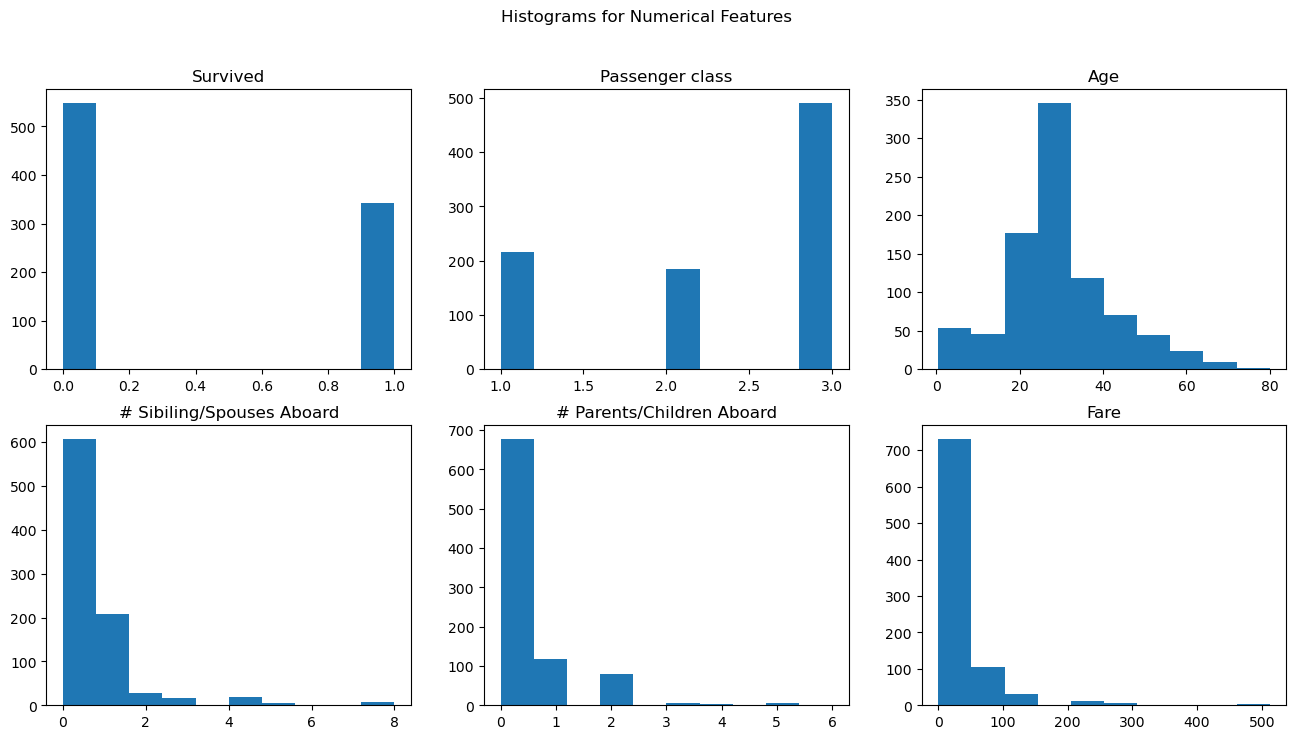

In [42]:
#get numerical features
numerical_features = list(copy.select_dtypes(['int', 'float']).columns)


#function to plot histograms
def plot_histogram(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j #get index position
            feature = features[idx]
            axs[i, j].hist(dataframe[feature])
            axs[i, j].set_title(feature)
    plt.suptitle('Histograms for Numerical Features')
    plt.show()

#plot histograms
plot_histogram(copy, numerical_features, 2, 3, (16, 8))

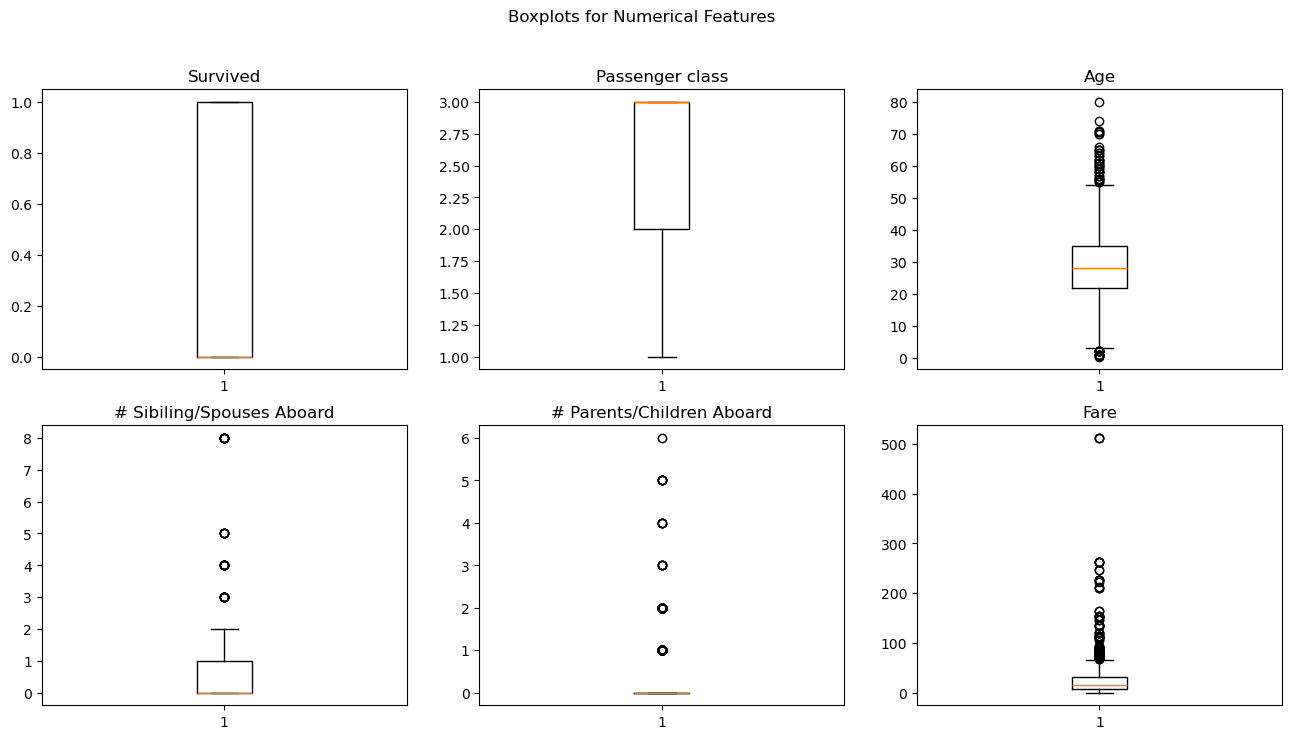

In [43]:
#plot box plots
def plot_boxplots(dataframe, features, num_rows, num_cols, fig_size):
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)
    for i in range(num_rows):
        for j in range(num_cols):

            idx = i * num_cols + j
            feature = features[idx]
            axs[i, j].boxplot(dataframe[feature])
            axs[i, j].set_title(feature)
    
    plt.suptitle('Boxplots for Numerical Features')
    plt.show()

plot_boxplots(copy, numerical_features, 2, 3, (16, 8))

Because we have nulls in Age, axs[i, j].boxplot() (equivalent to plt.boxplot()) the boxplot doesn't appear. using plt.boxplot give us more control on how deal with nulls manually. 

sns.boxplot is able to automatically deal with null values.

At the end of the Data Understanding/Overview phase, you should be able to understand/identify the following:
- size of dataframe,
- feature names and data types
- duplicates, if any
- nulls in each feature
- data distribution
- presence of outliers
- Some cleaning/formatting

It is important to assess the values and feature/column names of the dataframe as well. Do they make sense? Are there Abbreviations? if so, what do they stand for? Are Feature names decribing the feature?

The idea is to get a general understanding of the data before any manipulations are performed or hypothesis is developed. This stage will also identify data cleaning and formatting steps. 

# Outliers

Outliers are important to detect and handle as they can skew the data and any analysis. The simplest method is to remove them (8) with the use the Standard Deviation or Inter-Quartile Range methods(15), but you can replace it with the median or mean values (9). Finally, you can use transformation techniques like log transformation (8). Alternatively, if the outlier is due to collection methods, it may be better to use a more robust approach.

We need to deal with our outliers - we have no duplicates. Remember `copy.isnull().sum()` and the histograms we made above?

Can use Z - score (normal) or IQR method (non-normal)

This is one of the reasons why it is important to understand the data distribution.

#### Removing Outliers

Again, removing data should always be a last resort or if the data loss is minimal. It is important to consider how and why the outlier is there. 

In [44]:
#make copy
no_outliers = copy.copy()

my_features = ['Age', 'Fare']

#Removing outlier
Q1 = no_outliers[my_features].quantile(0.25)
Q3 = no_outliers[my_features].quantile(0.75)
IQR = Q3 - Q1

no_outliers = no_outliers[~((no_outliers[my_features] < (Q1 - 1.5 * IQR)) | (no_outliers[my_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

#calc loss from outlier loss
new_size = no_outliers.shape[0]
old_size = copy.shape[0]
loss = ((new_size / old_size) - 1) * 100
loss

-19.079685746352414

Removing outliers resulted in a 19% loss of our data. Filling nulls is crucial, especially if the dataset is small like this one.

## Log Transform

Only with Fare and Age as these are the only two actual numeric values


In [ ]:
#make copies of 

In [20]:
copy.head()

,PassengerId,Survived,Passenger class,Name,Sex,Age,# Sibiling/Spouses Aboard,# Parents/Children Aboard,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Queenstown
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Southhampton
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Queenstown
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Southhampton
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Southhampton


,Survived,Passenger class,Sex,Age,Fare
0,0,3,male,34.5,7.83
1,1,3,female,47.0,7.00
2,0,2,male,62.0,9.69
3,0,3,male,27.0,8.66
4,1,3,female,22.0,12.29


## Feature Analysis

## Statistical tests

There is a lot you can do here and it can be overwhelming, but here are some general goals:
- Break down by certain categories - e.g. age, sex/gender, outcome(survived or not) etc.,
- Use average values where appropriate e.g. what was the average age of survivors,
- explore the relationships among features - ideally you have dropped some columns as this step can become quite large,
- You really want to explore the features individually then in pairs.

Now that we have the features we are interested in we can explore the data a bit. From the graphs below we can see the count of Males and Females, those who survived and those who did not. 
*Note: Histograms and boxplots are part of feature analysis, but we did that in the Data Understanding phase. Remember, EDA is iterative, not linear.*

## Visuals

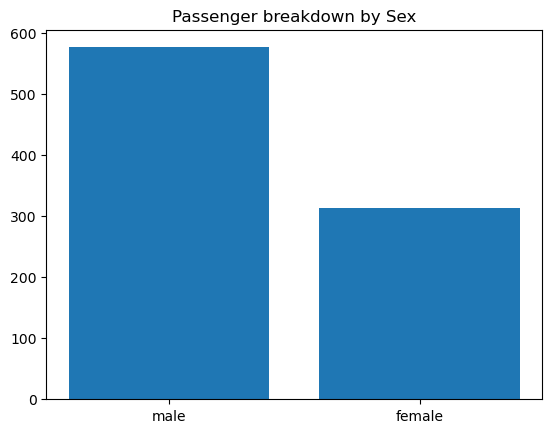

In [9]:
#breakdown of sex
X = copy['Sex'].value_counts().index
y = copy['Sex'].value_counts().values

#plot
plt.bar(X, y)
plt.title('Passenger breakdown by Sex')
plt.show()


In [17]:
#survival based on sex
sex_survival = copy.groupby('Survived')['Sex'].count()
sex_survival

Survived
0    549
1    342
Name: Sex, dtype: int64

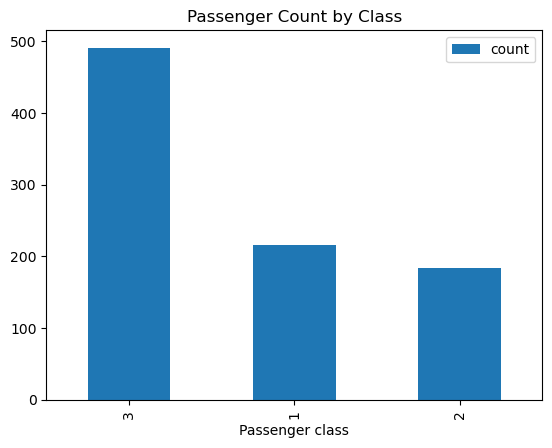

In [14]:
#passenger count by class or socioeconomic status
passenger_class_count = pd.DataFrame(copy['Passenger class'].value_counts())
passenger_class_count = passenger_class_count.reset_index()

#plot
passenger_class_count.plot.bar(x='Passenger class', y='count')
plt.title('Passenger Count by Class')
plt.show()


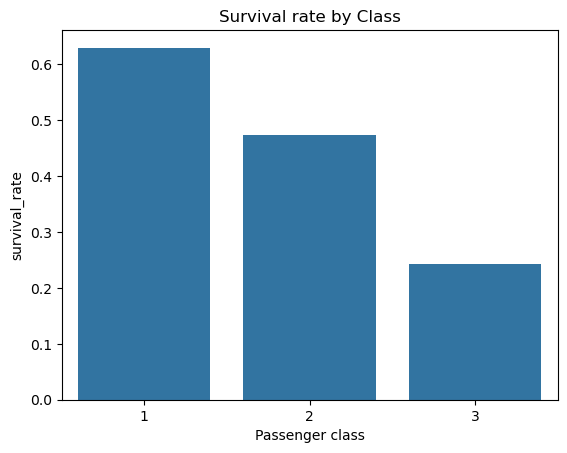

In [16]:
# Group the data by passenger class and survival status
grouped = copy.groupby(['Passenger class', 'Survived']).size().reset_index(name='count')

# Calculate the survival rate for each passenger class
survival_rate = grouped.pivot(index='Passenger class', columns='Survived', values='count')
survival_rate['total'] = survival_rate.sum(axis=1)
survival_rate['survival_rate'] = survival_rate[1] / survival_rate['total']

# Plot the survival rate per passenger class
sns.barplot(x=survival_rate.index, y='survival_rate', data=survival_rate)
plt.title('Survival rate by Class')
plt.show()

<Axes: >

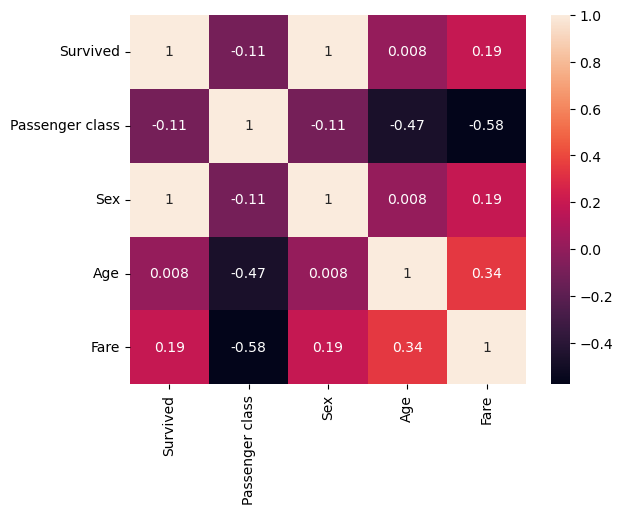

In [135]:
#explore correlation among variables in a heatmap
correlation = copy.corr()
sns.heatmap(correlation, annot=True)

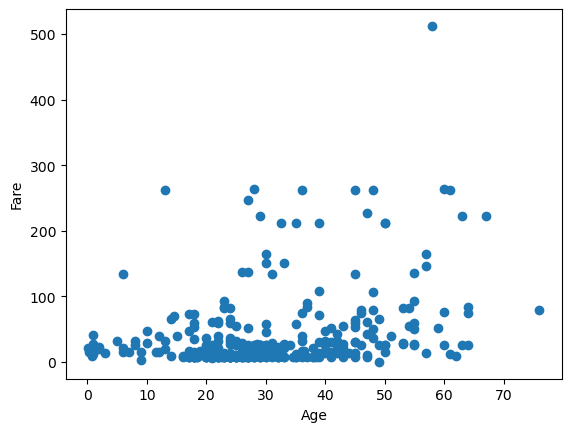

In [189]:
#you can make a scatter plot by each pair using the code below, but it can be take time especially if you have lots of columns.
plt.scatter(x=copy['Age'], y=copy['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

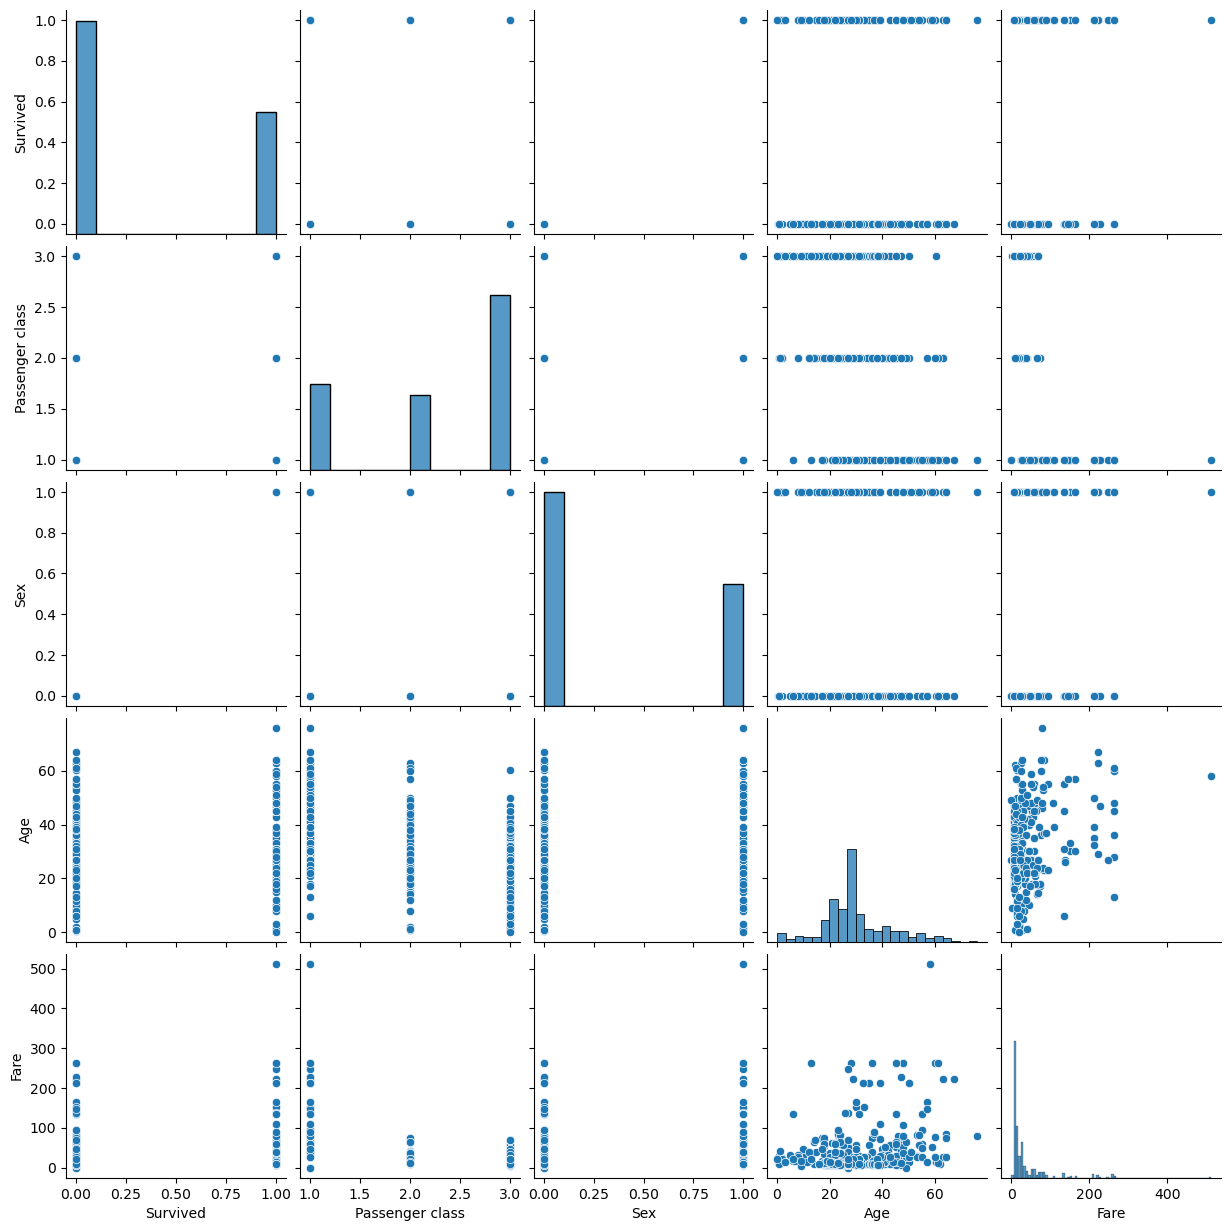

In [136]:
#This creates a figure for each pair and plots them, it does take a while so a limited number of features is recommended
#The above scatter plot can be found on the plot below
sns.pairplot(copy)

## Conclusion

EDA allows the data to reveal aspects of itself that may not have been obvious. EDA's overarching goal is to better understand the data and prepare it for analysis. EDA is not linear, but rather iterative as the above goals of EDA - Data Understanding, Data Cleaning, and Feature Analysis - can be done together; these goals do not occur in a vaccuum. For instance, I performed Feature Analysis to identify outliers in the data understanding phase and I performed Data Cleaning in the Data Understanding part as well. EDA is the most crucial step in data analysis and it is equally important to remember that EDA is an iterative process, not a linear process.

## References

1. [What is Exploratory Data Analysis? | IBM](https://www.ibm.com/topics/exploratory-data-analysis)
2. [What is Exploratory Data Analysis? Steps and Market Analysis | Simplilearn](https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis)
3. [4 Steps for Exploratory Data Analysis | EDA Techniques (quanthub.com)](https://www.quanthub.com/what-are-the-steps-in-eda/)
4. [An Extensive Step by Step Guide to Exploratory Data Analysis | by Terence Shin | Towards Data Science (archive.org)](https://web.archive.org/web/20230523083940/https:/towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e?gi=9eab35dc2721)
5. [Top Techniques to Handle Missing Values Every Data Scientist Should Know | DataCamp](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values)
6. https://mosaicdatascience.com/2014/03/03/data-science-design-pattern-3-handling-null-values/ 
7. https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/ 
8. https://statisticsbyjim.com/basics/remove-outliers/
9. https://www.analyticsvidhya.com/blog/2021/07/how-to-treat-outliers-in-a-data-set/ 
10. https://www.geeksforgeeks.org/what-is-feature-engineering/ 
11. https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf 
12. [pandas documentation — pandas 2.1.1 documentation (pydata.org)](https://pandas.pydata.org/docs/index.html)
13. [matplotlib.pyplot — Matplotlib 3.8.0 documentation](matplotlib.pyplot — Matplotlib 3.8.0 documentation)
14. [seaborn: statistical data visualization — seaborn 0.13.0 documentation (pydata.org)](https://seaborn.pydata.org/)
15. [How to Remove Outliers for Machine Learning - MachineLearningMastery.com](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
